### Part I: Data exploration

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
market_data = pd.read_csv('data/pdf_generated.csv')
market_data

,Time,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot,Area,Homes Type,Median Selling Price
0,2017-01,830,1749,2.1,909,686,72.0,0.960,291,Greater Boston Market Summary,Single,520000
1,2017-01,610,1218,2.0,829,601,49.0,0.977,484,Greater Boston Market Summary,Condominiums,500000
2,2017-01,114,324,2.8,129,95,80.0,0.941,302,Central Middlesex Region,Single,677500
3,2017-01,28,85,3.0,37,31,61.0,0.965,241,Central Middlesex Region,Condominiums,356000
4,2017-01,138,217,1.6,145,101,52.0,0.977,279,Eastern Middlesex Region,Single,490000
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2022-06,90,85,0.9,98,65,14.0,1.040,343,Metro West Region,Condo,642500
162,2022-06,311,320,1.0,378,283,19.0,1.060,344,Southern Norfolk Region,Single,680000
163,2022-06,101,92,0.9,91,69,18.0,1.051,330,Southern Norfolk Region,Condo,484000
164,2022-06,140,204,1.5,170,122,20.0,1.047,503,City Of Boston,Single,830000


### Columns
1. Time: The month and year of the snapshot.
2. Median Selling Price: The median selling price for homes of the specified type in the specified area during the specified month.
3. Units Sold: The number of homes of the specified type that were sold in the specified area during the specified month.
4. Active Listings: The number of homes of the specified type that were actively listed for sale in the specified area at the end of the specified month.
5. Months Supply of Inventory: The estimated number of months it would take to sell all the homes currently listed for sale in the specified area, based on the current rate of sales.
6. New Listings: The number of new homes of the specified type that were listed for sale in the specified area during the specified month.
7. Pending Sales: The number of homes of the specified type that were under contract and awaiting closing at the end of the specified month.
8. Days to Off Market: The median number of days that homes of the specified type were on the market before going under contract during the specified month.
9. Sold to Original Price Ratio: The median ratio of the final selling price to the original listing price for homes of the specified type that were sold in the specified area during the specified month.
10. Price per Square Foot: The median selling price per square foot for homes of the specified type in the specified area during the specified month.
11. Area: The geographic region within Greater Boston that the data pertains to.
12. Homes Type: The type of home that the data pertains to (single-family homes or condominiums).
13. Family Members: How many family members are in the household

In [60]:
np.random.seed(123)

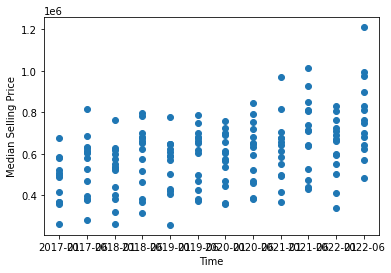

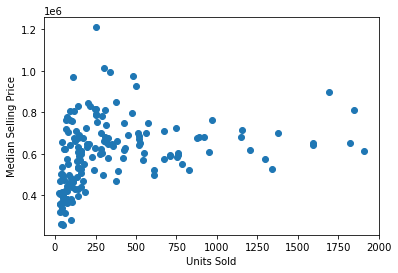

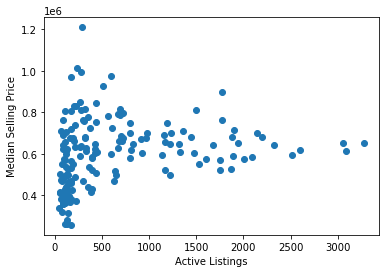

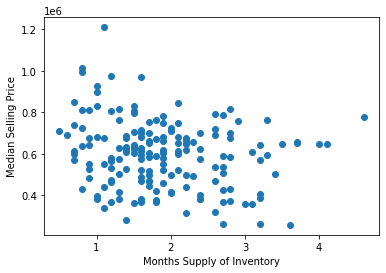

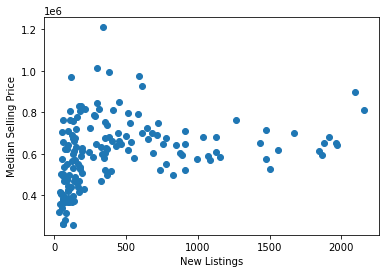

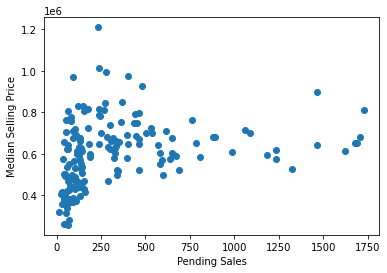

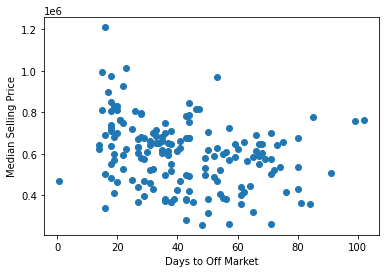

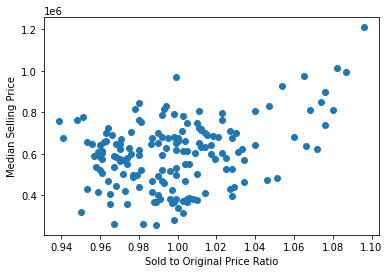

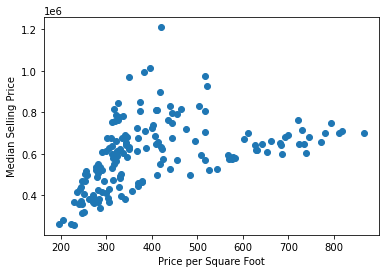

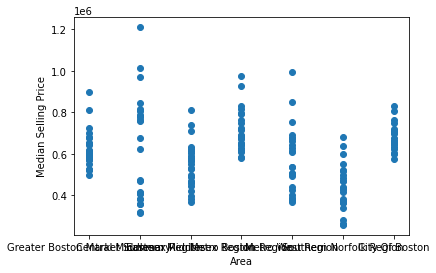

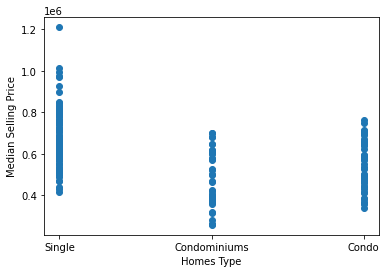

In [61]:
# Create a scatter plot for each variable associate with Median Selling Price
feature_list = market_data.columns.values.tolist() 

for i in range (market_data.shape[1]-1):
    plt.scatter(market_data.iloc[:, i], market_data['Median Selling Price'])
    plt.xlabel(feature_list[i])
    plt.ylabel('Median Selling Price')
    plt.show()

Fit a linear model of Median Selling Price on all input variables on the training data. Report the summary (e.g R2, T statistic, and p-value) of the fitted linear model. 

In [62]:
from sklearn.model_selection import train_test_split

X = market_data[['Units Sold', "Active Listings", "Months Supply of Inventory", 
                 "New Listings", "Pending Sales", "Days to Off Market", "Sold to Original Price Ratio", 
                 "Price per Square Foot"]]
y = market_data["Median Selling Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [63]:
import statsmodels.api as sm

# Add a constant term to the input features to fit an intercept
X_train = sm.add_constant(X_train)

# Fit a linear regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the fitted model
print(model.summary())


                             OLS Regression Results                             
Dep. Variable:     Median Selling Price   R-squared:                       0.322
Model:                              OLS   Adj. R-squared:                  0.278
Method:                   Least Squares   F-statistic:                     7.294
Date:                  Thu, 23 Mar 2023   Prob (F-statistic):           6.71e-08
Time:                          16:38:01   Log-Likelihood:                -1743.7
No. Observations:                   132   AIC:                             3505.
Df Residuals:                       123   BIC:                             3531.
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

**Top three important feature based on their coefficient abs value: Sold to Original Price Ratio, Months Supply of Inventory, Days to Off Market**

### Part II: Feature selection

Perform the best subset selection on the training data. Report the predictors selected in the best one-predictor model, two-predictor model, and three-predictor model

In [64]:
X_train.drop('const', axis = 1, inplace = True)

In [74]:
X_train

,Units Sold,Active Listings,Months Supply of Inventory,New Listings,Pending Sales,Days to Off Market,Sold to Original Price Ratio,Price per Square Foot
74,425,795,1.9,528,454,36.0,1.005,445
122,77,115,1.5,51,51,50.0,0.976,517
42,292,564,1.9,284,244,43.0,1.003,336
127,54,66,1.2,92,74,25.0,1.046,315
7,418,793,1.9,557,397,49.0,0.974,584
...,...,...,...,...,...,...,...,...
17,141,146,1.0,132,130,29.0,1.028,333
98,203,433,2.1,296,272,44.0,0.980,326
66,55,130,2.4,90,56,60.0,0.970,422
126,301,234,0.8,299,241,23.0,1.082,396


In [65]:
import numpy as np
from itertools import combinations
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate the RSS and p to each possible subset combinations
n, p = X_train.shape
models = []
X = X_train.values
y = y_train.values
for j in range(1, p+1):
    for subset in combinations(range(p), j):
        model = LinearRegression().fit(X[:, subset], y)
        rss = mean_squared_error(y, model.predict(X[:, subset])) * (n - j)
        subset_new = tuple(x + 1 for x in subset)
        models.append({'model': subset_new, 'RSS': rss, 'p': j})
models = pd.DataFrame(models)
models

,model,RSS,p
0,"(1,)",3.134341e+12,1
1,"(2,)",3.257677e+12,1
2,"(3,)",3.223472e+12,1
3,"(4,)",3.148702e+12,1
4,"(5,)",3.159187e+12,1
...,...,...,...
250,"(1, 2, 3, 5, 6, 7, 8)",2.181285e+12,7
251,"(1, 2, 4, 5, 6, 7, 8)",2.181981e+12,7
252,"(1, 3, 4, 5, 6, 7, 8)",2.184233e+12,7
253,"(2, 3, 4, 5, 6, 7, 8)",2.180776e+12,7


In [66]:
# Only need 3 models
models = models[models['p'] < 4]
models = models.sort_values(by='RSS')
models['RSS'] = models['RSS'].apply(lambda x: round(x, 3))

models_1p = models[models['p'] == 1]
models_2p = models[models['p'] == 2]
models_3p = models[models['p'] == 3]

In [67]:
print("one-predictor model \n",models_1p)
print("The best predictors selected for one-predictor model:", [feature_list[i] for i in models_1p.iloc[0][0]],"\n")
print("two-predictor model \n", models_2p)
print("The best predictors selected for two-predictor model:", [feature_list[i] for i in models_2p.iloc[0][0]],"\n")
print("three-predictor model \n", models_3p)
print("The best predictors selected for two-predictor model:", [feature_list[i] for i in models_3p.iloc[0][0]],"\n")

one-predictor model 
   model           RSS  p
6  (7,)  2.833137e+12  1
7  (8,)  2.850152e+12  1
5  (6,)  3.093194e+12  1
0  (1,)  3.134341e+12  1
3  (4,)  3.148702e+12  1
4  (5,)  3.159187e+12  1
2  (3,)  3.223472e+12  1
1  (2,)  3.257677e+12  1
The best predictors selected for one-predictor model: ['Sold to Original Price Ratio'] 

two-predictor model 
      model           RSS  p
35  (7, 8)  2.352004e+12  2
25  (3, 8)  2.571455e+12  2
34  (6, 8)  2.635800e+12  2
28  (4, 7)  2.647600e+12  2
19  (2, 7)  2.655606e+12  2
13  (1, 7)  2.666851e+12  2
31  (5, 7)  2.675278e+12  2
14  (1, 8)  2.780880e+12  2
32  (5, 8)  2.795764e+12  2
24  (3, 7)  2.800855e+12  2
33  (6, 7)  2.801406e+12  2
29  (4, 8)  2.811525e+12  2
20  (2, 8)  2.827589e+12  2
27  (4, 6)  2.910551e+12  2
12  (1, 6)  2.913142e+12  2
30  (5, 6)  2.931784e+12  2
21  (3, 4)  2.946190e+12  2
18  (2, 6)  2.955071e+12  2
22  (3, 5)  2.989928e+12  2
9   (1, 3)  2.994631e+12  2
16  (2, 4)  2.994740e+12  2
15  (2, 3)  3.014807e+12  

Perform forward stepwise selection on the training data. Report the predictors selected in the best one-predictor model, two-predictor model, and three-predictor model. 

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Calculate Rss and p value for each possible combinatio using forward stepwise selection
n, p = X.shape
included = []
excluded = list(range(p))
model_b = LinearRegression()
rss = mean_squared_error(y, model_b.fit(np.ones((n, 1)), y).predict(np.ones((n, 1)))) * n
models_b = [{'model': [], 'RSS': rss, 'p': 0}]
X = X_train.values
y = y_train.values
for i in range(1, p+1):
    best_rss = np.inf
    best_j = None
    for j in excluded:
        candidate_model = included + [j]
        candidate_X = X[:, candidate_model]
        candidate_rss = mean_squared_error(y, model_b.fit(candidate_X, y).predict(candidate_X)) * (n - i)
        if candidate_rss < best_rss:
            best_rss = candidate_rss
            best_j = j
    included.append(best_j)
    excluded.remove(best_j)
    included_new = tuple(x + 1 for x in included.copy())
    models_b.append({'model': included_new, 'RSS': best_rss, 'p': i})
models_b = pd.DataFrame(models_b)
models_b

,model,RSS,p
0,[],3.391921e+12,0
1,"(7,)",2.833137e+12,1
2,"(7, 8)",2.352004e+12,2
3,"(7, 8, 6)",2.298962e+12,3
4,"(7, 8, 6, 3)",2.260480e+12,4
5,"(7, 8, 6, 3, 1)",2.227013e+12,5
6,"(7, 8, 6, 3, 1, 2)",2.201637e+12,6
7,"(7, 8, 6, 3, 1, 2, 5)",2.181285e+12,7
8,"(7, 8, 6, 3, 1, 2, 5, 4)",2.161060e+12,8


In [69]:
# Only need 3 models
models_b = models_b[models_b['p'] < 4]
models_b = models_b.sort_values(by='RSS')
models_b['RSS'] = models_b['RSS'].apply(lambda x: round(x, 3))

models_1pf = models_b[models_b['p'] == 1]
models_2pf = models_b[models_b['p'] == 2]
models_3pf = models_b[models_b['p'] == 3]

In [70]:
print("one-predictor model \n",models_1pf)
print("The best predictors selected for one-predictor model:", [feature_list[i] for i in models_1pf.iloc[0][0]],"\n")
print("two-predictor model \n", models_2pf)
print("The best predictors selected for two-predictor model:", [feature_list[i] for i in models_2pf.iloc[0][0]],"\n")
print("three-predictor model \n", models_3pf)
print("The best predictors selected for two-predictor model:", [feature_list[i] for i in models_3pf.iloc[0][0]],"\n")

one-predictor model 
   model           RSS  p
1  (7,)  2.833137e+12  1
The best predictors selected for one-predictor model: ['Sold to Original Price Ratio'] 

two-predictor model 
     model           RSS  p
2  (7, 8)  2.352004e+12  2
The best predictors selected for two-predictor model: ['Sold to Original Price Ratio', 'Price per Square Foot'] 

three-predictor model 
        model           RSS  p
3  (7, 8, 6)  2.298962e+12  3
The best predictors selected for two-predictor model: ['Sold to Original Price Ratio', 'Price per Square Foot', 'Days to Off Market'] 



Fit a three-predictor model using the best predictors in subset selection and forward stepwise selection on the training data.

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the features for the three-predictor model
X_train_a = X_train[["Days to Off Market", "Sold to Original Price Ratio", "Price per Square Foot"]]
X_test_a = X_test[["Days to Off Market", "Sold to Original Price Ratio", "Price per Square Foot"]]

# Fit the linear regression model on the training data
lm_a = LinearRegression()
lm_a.fit(X_train_a, y_train)

# Make predictions on the training and test data
y_train_pred_a = lm_a.predict(X_train_a)
y_test_pred_a = lm_a.predict(X_test_a)

# Calculate the mean squared error for the training and test data
train_mse_a = mean_squared_error(y_train, y_train_pred_a)
test_mse_a = mean_squared_error(y_test, y_test_pred_a)

# Print the training and test MSE
print("Train MSE", train_mse_a)
print("Test MSE", test_mse_a)

Train MSE 17821414112.465706
Test MSE 22980352932.9447
